In [1]:
import pandas as panda 
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
#Leser inn csv filen og setter opp en delimiter så den blir lesbar
dataframe = panda.read_csv('Ruter_data.csv',delimiter=';')
dataframe.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [3]:
dataframe.dtypes

TurId                                        object
Dato                                         object
Fylke                                        object
Område                                       object
Kommune                                      object
Holdeplass_Fra                               object
Holdeplass_Til                               object
Linjetype                                    object
Linjefylke                                   object
Linjenavn                                    object
Linjeretning                                  int64
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra     object
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra      object
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra    object
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra     object
Kjøretøy_Kapasitet                            int64
Passasjerer_Ombord                            int64
dtype: object

In [4]:
timedeltaplanlagt = panda.to_timedelta(dataframe['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'])
#dataframe['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = panda.to_timedelta(dataframe['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'])

In [5]:
dataframe.dtypes

TurId                                        object
Dato                                         object
Fylke                                        object
Område                                       object
Kommune                                      object
Holdeplass_Fra                               object
Holdeplass_Til                               object
Linjetype                                    object
Linjefylke                                   object
Linjenavn                                    object
Linjeretning                                  int64
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra     object
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra      object
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra    object
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra     object
Kjøretøy_Kapasitet                            int64
Passasjerer_Ombord                            int64
dtype: object

In [6]:
timedeltafaktisk = panda.to_timedelta(dataframe['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
#dataframe['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = panda.to_timedelta(dataframe['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
#dataframe['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = dataframe['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].astype('timedelta64[s]')

In [7]:
#Her lager jeg en ny kolonne hvor jeg har kalkulert differansen mellom faktisk og planlagt ankomst i sekunder
dataframe['Differanse_ankomst'] = panda.to_timedelta(timedeltafaktisk - timedeltaplanlagt) / np.timedelta64(1,'s')
#panda.to_timedelta((dataframe['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] - dataframe['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'])) / np.timedelta64(1,'s')

In [8]:
dataframe

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Differanse_ankomst
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,53.0
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,20.0
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,-4.0
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,64.0
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,10/06/2020,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,16:23:18,16:23:48,16:10:00,16:10:00,151,2,798.0
5996,10010-2020-06-23T05:54:00+02:00,23/06/2020,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,06:00:32,06:00:40,05:59:00,05:59:00,151,2,92.0
5997,2007-2020-06-11T17:22:00+02:00,11/06/2020,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,17:42:43,17:43:10,17:32:00,17:32:00,106,3,643.0
5998,10004-2020-08-13T04:59:00+02:00,13/08/2020,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,06:00:11,06:00:23,05:59:00,05:59:00,151,5,71.0


In [9]:
dataframe.dtypes

TurId                                         object
Dato                                          object
Fylke                                         object
Område                                        object
Kommune                                       object
Holdeplass_Fra                                object
Holdeplass_Til                                object
Linjetype                                     object
Linjefylke                                    object
Linjenavn                                     object
Linjeretning                                   int64
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra      object
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra       object
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra     object
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra      object
Kjøretøy_Kapasitet                             int64
Passasjerer_Ombord                             int64
Differanse_ankomst                           float64
dtype: object

In [10]:
dataframe.head(50)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Differanse_ankomst
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,53.0
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,20.0
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,-4.0
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,64.0
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,73.0
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,17:22:56,17:23:23,17:16:00,17:16:00,151,8,416.0
6,15010-2020-07-28T13:09:00+02:00,28/07/2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,0,13:19:00,13:19:05,13:17:00,13:17:00,112,1,120.0
7,15003-2020-07-27T06:18:00+02:00,27/07/2020,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,1,06:20:24,06:20:29,06:20:00,06:20:00,112,-1,24.0
8,21002-2020-08-16T14:33:00+02:00,16/08/2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,1,15:10:12,15:10:34,15:09:00,15:09:00,112,2,72.0
9,15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,18:37:41,18:38:19,18:29:00,18:29:00,112,4,521.0


In [11]:
#Her finner jeg alle null verdiene i tabellen
nullvalues = dataframe[dataframe.isna().any(axis=1)]

In [12]:
#Her printer jeg radene som inneholder nullverdiene
nullvalues

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Differanse_ankomst
245,30009-2020-07-10T10:10:00+02:00,10/07/2020,Oslo,Nordøst,Stovner,Folkvangveien (mot Furuset),Furuset skole (Karihaugveien mot sentrum),Lokal,Viken,110,0,:,01:22:34,10:43:00,10:43:00,106,0,NaN
333,55007-2020-06-07T17:30:00+02:00,07/06/2020,Viken,Sør,Enebakk,Stranden skole,Sundby,Lokal,Viken,350,1,:,17:40:55,17:40:00,17:40:00,80,2,NaN
346,39009-2020-06-16T13:48:00+02:00,16/06/2020,Viken,Nordøst,Nittedal,Løvstad,Varingskollen,Lokal,Viken,390,0,:,13:57:17,13:56:00,13:56:00,115,4,NaN
511,55001-2020-07-30T07:30:00+02:00,30/07/2020,Viken,Nordøst,Rælingen,Fjellstadfeltet,Bye,Lokal,Viken,350,0,:,07:51:46,07:50:00,07:50:00,80,-6,NaN
588,47008-2020-07-21T06:13:00+02:00,21/07/2020,Viken,Nordøst,Lillestrøm,Øvre Dalen,Nygårdstoppen,Ekspress,Viken,480E,0,:,06:55:18,06:52:00,06:52:00,106,5,NaN
602,3102-2020-07-05T05:44:00+02:00,05/07/2020,Oslo,Indre By,Sentrum,Tollboden (Plf. N - mot øst),Hausmanns bru (fra sentrum),Lokal,Oslo,31,0,:,06:18:59,06:15:00,06:15:00,151,8,NaN
637,45005-2020-07-31T19:36:00+02:00,31/07/2020,Viken,Nordøst,Ullensaker,Romerike folkehøgskole,Skogtun,Lokal,Viken,450,1,:,19:45:27,19:44:00,19:44:00,106,12,NaN
653,45006-2020-08-08T14:06:00+02:00,08/08/2020,Viken,Nordøst,Ullensaker,Gardermoen Næringspark,Lokevegen (mot Jessheim),Lokal,Viken,450,1,:,14:13:58,14:11:00,14:11:00,106,15,NaN
806,34021-2020-07-02T15:15:00+02:00,02/07/2020,Viken,Nordøst,Lillestrøm,Bjørnsons gate,Nittedalsgata (mot Lillestrøm),Lokal,Viken,340,0,:,17:54:06,15:38:00,15:38:00,105,0,NaN
815,34005-2020-07-01T13:31:00+02:00,01/07/2020,Viken,Nordøst,Lillestrøm,Forskningsparken (Kjeller),Kjeller,Lokal,Viken,340,1,:,13:42:56,13:41:00,13:41:00,105,3,NaN


In [13]:
#Her dropper jeg alle rader som inneholder manglende verdier, i dette tilfellet manglet vi klokkeslett for faktisk ankomst
dataframe = dataframe.dropna()

In [14]:
nullvalues = dataframe[dataframe.isna().any(axis=1)]

In [15]:
nullvalues

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Differanse_ankomst


In [16]:
dataframe.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Differanse_ankomst
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,53.0
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,20.0
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,-4.0
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,64.0
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,73.0


In [17]:
dataframe.shape

(5950, 18)

In [18]:
dataframe.Differanse_ankomst

0        53.0
1        20.0
2        -4.0
3        64.0
4        73.0
        ...  
5995    798.0
5996     92.0
5997    643.0
5998     71.0
5999    164.0
Name: Differanse_ankomst, Length: 5950, dtype: float64

In [24]:
tidsbruklinjetype = dataframe[['Linjetype','Differanse_ankomst']]

In [25]:
tidsbruklinjetype_gruppert = tidsbruklinjetype.groupby('Linjetype').sum()

In [26]:
#Her har jeg laget en tabell som viser tidsbruken på ankomst per linjetype.
#Vi sammenligner den faktiske ankomsten med den planlagte
tidsbruklinjetype_gruppert

,Differanse_ankomst
Linjetype,
Ekspress,16484.0
Lokal,530360.0
Natt,910.0
Skole,3599.0


<AxesSubplot:xlabel='Linjetype'>

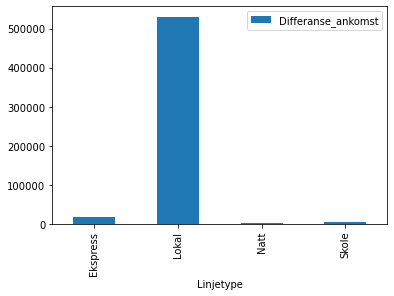

In [35]:
#Ettersom at dataen inneholder veldig høye tall må vi fjerne outliers
tidsbruklinjetype_gruppert.sort_index().plot.bar()

In [80]:
threshold_max = tidsbruklinjetype['Differanse_ankomst'].quantile(0.60)

In [81]:
threshold_max

109.0

In [84]:
threshold_min = tidsbruklinjetype['Differanse_ankomst'].quantile(0.10)

In [85]:
threshold_min

-19.0

In [86]:
tidsbruklinjetype[tidsbruklinjetype['Differanse_ankomst']>threshold_max]

,Linjetype,Differanse_ankomst
5,Lokal,416.0
6,Lokal,120.0
9,Lokal,521.0
10,Lokal,307.0
11,Lokal,391.0
...,...,...
5990,Lokal,181.0
5994,Lokal,121.0
5995,Lokal,798.0
5997,Lokal,643.0


In [87]:
new_tidsbruklinjetype=tidsbruklinjetype[(tidsbruklinjetype['Differanse_ankomst']<threshold_max)&(tidsbruklinjetype['Differanse_ankomst']>threshold_min)]

In [88]:
new_tidsbruklinjetype

,Linjetype,Differanse_ankomst
0,Lokal,53.0
1,Lokal,20.0
2,Lokal,-4.0
3,Lokal,64.0
4,Lokal,73.0
...,...,...
5989,Lokal,5.0
5991,Lokal,51.0
5993,Lokal,58.0
5996,Lokal,92.0


In [89]:
tidsbruklinjetype_gruppert = new_tidsbruklinjetype.groupby('Linjetype').sum()

In [90]:
tidsbruklinjetype_gruppert

,Differanse_ankomst
Linjetype,
Ekspress,3521.0
Lokal,144112.0
Skole,1851.0


<AxesSubplot:xlabel='Linjetype'>

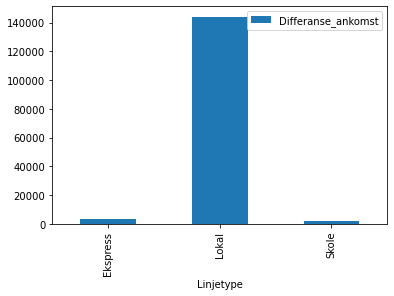

In [91]:
tidsbruklinjetype_gruppert.sort_index().plot.bar()